In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import copy
from types import SimpleNamespace
import warnings
warnings.filterwarnings('ignore')

In [2]:
fullData = pd.read_csv("Rtable_2.csv")
fullData.drop(columns=fullData.columns[0], axis=1, inplace=True)


In [3]:
fullData

,Dead,Sexo,Edad_a_os__actual_,dias_estancia,paso_uci,saturaciono_1,saturaciono_2,saturaciono_3,saturaciono_4,temperatura_1,...,San-Linfocitos_absVal,San-Linfocitos_Pct,San-Monocitos_absVal_pat,San-Monocitos_Pct_pat,San-Monocitos_absVal,San-Monocitos_Pct,San-Neutrófilos_absVal_pat,San-Neutrófilos_Pct_pat,San-Neutrófilos_absVal,San-Neutrófilos_Pct
0,True,0,86,5.0,0,94.2,95.3,96.0,93.3,37.1,...,0.70890,10.200000,1,0,0.89655,12.9,0,1,5.30980,76.400002
1,False,1,97,10.0,0,95.3,92.9,95.7,93.9,37.3,...,1.38050,27.500000,0,0,0.24090,10.9,0,1,3.23790,76.199997
2,True,1,94,3.0,0,69.7,43.0,40.0,50.9,35.0,...,0.75632,5.800000,1,0,1.03016,7.9,1,1,11.22744,86.099998
3,False,1,91,8.0,0,96.0,93.8,94.2,97.1,36.1,...,0.43320,14.400000,0,0,0.24255,7.0,0,1,6.00495,89.599998
4,False,0,90,8.0,0,95.6,95.5,94.2,94.7,36.6,...,0.39864,10.700000,0,1,0.54900,14.1,0,1,3.48357,79.300003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,False,1,50,3.0,0,95.0,95.3,95.3,94.5,37.0,...,1.18859,22.299999,0,0,0.28782,5.4,0,0,3.81095,71.500000
1453,False,1,34,3.0,0,98.0,97.0,97.5,97.0,37.2,...,1.18734,48.400002,0,0,0.21924,8.8,1,1,1.06092,44.200001
1454,False,1,63,7.0,0,96.0,96.8,95.4,95.6,36.8,...,1.33730,28.000000,0,0,0.14928,6.0,0,1,4.70854,76.900002
1455,False,1,32,1.0,0,98.5,98.0,97.0,98.0,36.3,...,1.29960,38.000000,0,0,0.21888,6.4,0,0,1.76130,51.500000


In [4]:
pac_vars = [
#     "Id_Paciente",
    "Dead",
    "Sexo",
    "Edad_a_os__actual_",
    "dias_estancia",
    "paso_uci"
]
time_vars = ['saturaciono_1', 'saturaciono_2', 'saturaciono_3', 'saturaciono_4',
       'temperatura_1', 'temperatura_2', 'temperatura_3', 'temperatura_4',
       'frecuenciac_1', 'frecuenciac_2', 'frecuenciac_3', 'frecuenciac_4',
       'sysPres_1', 'sysPres_2', 'sysPres_3', 'sysPres_4', 'diasPres_1',
       'diasPres_2', 'diasPres_3', 'diasPres_4'
]
ventilator_vars = ['tiposaturac_GafasO2_1',
       'tiposaturac_GafasO2_2', 'tiposaturac_GafasO2_3',
       'tiposaturac_GafasO2_4', 'tiposaturac_VMK_1', 'tiposaturac_VMK_2',
       'tiposaturac_VMK_3', 'tiposaturac_VMK_4', 'tiposaturac_Optiflow_1',
       'tiposaturac_Optiflow_2', 'tiposaturac_Optiflow_3',
       'tiposaturac_Optiflow_4'
]
blood_vars = ['San-Basófilos_absVal_pat',
       'San-Basófilos_Pct_pat', 'San-Basófilos_absVal',
       'San-Basófilos_Pct', 'San-Eosinófilos_absVal_pat',
       'San-Eosinófilos_Pct_pat', 'San-Eosinófilos_absVal',
       'San-Eosinófilos_Pct', 'San-Linfocitos_absVal_pat',
       'San-Linfocitos_Pct_pat', 'San-Linfocitos_absVal',
       'San-Linfocitos_Pct', 'San-Monocitos_absVal_pat',
       'San-Monocitos_Pct_pat', 'San-Monocitos_absVal',
       'San-Monocitos_Pct', 'San-Neutrófilos_absVal_pat',
       'San-Neutrófilos_Pct_pat', 'San-Neutrófilos_absVal',
       'San-Neutrófilos_Pct'
]

In [5]:
current_variables = pac_vars+time_vars+ventilator_vars
plugin=fullData[current_variables]
plugin

,Dead,Sexo,Edad_a_os__actual_,dias_estancia,paso_uci,saturaciono_1,saturaciono_2,saturaciono_3,saturaciono_4,temperatura_1,...,tiposaturac_GafasO2_3,tiposaturac_GafasO2_4,tiposaturac_VMK_1,tiposaturac_VMK_2,tiposaturac_VMK_3,tiposaturac_VMK_4,tiposaturac_Optiflow_1,tiposaturac_Optiflow_2,tiposaturac_Optiflow_3,tiposaturac_Optiflow_4
0,True,0,86,5.0,0,94.2,95.3,96.0,93.3,37.1,...,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,False,1,97,10.0,0,95.3,92.9,95.7,93.9,37.3,...,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,True,1,94,3.0,0,69.7,43.0,40.0,50.9,35.0,...,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,False,1,91,8.0,0,96.0,93.8,94.2,97.1,36.1,...,0.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0
4,False,0,90,8.0,0,95.6,95.5,94.2,94.7,36.6,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,False,1,50,3.0,0,95.0,95.3,95.3,94.5,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1453,False,1,34,3.0,0,98.0,97.0,97.5,97.0,37.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1454,False,1,63,7.0,0,96.0,96.8,95.4,95.6,36.8,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,False,1,32,1.0,0,98.5,98.0,97.0,98.0,36.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Regressions

Since we're making binary predictions (Dead/Alive), we want to use classification methods, so things like SVMs, Gradient Boosting(XGBoost), KNNs, Random Forest and regular logistic regressions

We can also try our hand at hyperparameter tuning with each one of these, cross-validation stuff too

Another thing you have to keep in mind as you write these, by the way, is how vulnerable these algorithms are to collinearity, cuz your temporally related variables are going to be correlated within themselves, obviously

It would also be worth it to, when comparing, not only compare the accuracy and error type, but also the execution time, to compare performance cost. It won't be important when using it, but it will dictate how long it takes to update the model when it is.

Also, we dont need to calculate MSE or anything for now since we're only predicting whether they died or not, BUT, if instead we want to predict length of stay, we'd need to 

Is train-test split fine or should I try K-fold or some such stuff?

In [6]:
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [25]:
def ez95CI(stuff):
    return 1.96 * (np.std(stuff, ddof=1) / math.sqrt(len(stuff)))

In [15]:
def runmodel(data,model):
       X = data.drop(columns=["Dead"])
       y = data['Dead']

       kf = KFold(n_splits=5, shuffle=True, random_state=256)
       
       accuracies = []
       precisions = []
       recalls = []
       f1s = []
       Ftimes = []
       Ptimes = []

       for train_index, test_index in kf.split(X):
              X_train, X_test = X.iloc[train_index], X.iloc[test_index]
              y_train, y_test = y.iloc[train_index], y.iloc[test_index]

              start= time.time() #training efficiency
              model.fit(X_train, y_train)
              end= time.time()
              fit_time = end - start

              start= time.time() #operational efficiency
              y_pred = model.predict(X_test)
              end= time.time()
              pred_time = end - start

              accuracies.append(accuracy_score(y_test, y_pred))
              precisions.append(precision_score(y_test, y_pred))
              recalls.append(recall_score(y_test, y_pred))
              f1s.append(f1_score(y_test, y_pred))
              Ftimes.append(fit_time)
              Ptimes.append(pred_time)

       out = {"accuracy":   np.mean(accuracies),
              "precision":  np.mean(precisions),
              "recall":     np.mean(recalls),
              "f1":         np.mean(f1s),
              "Ftime":      np.mean(Ftimes),
              "Ptime":      np.mean(Ptimes),
              "a95": ez95CI(accuracies),
              "p95": ez95CI(precisions),
              "r95": ez95CI(recalls),
              "f195": ez95CI(f1s),
              "ft95": ez95CI(Ftimes),
              "pt95": ez95CI(Ptimes)
              }
       return out
       # return SimpleNamespace(**out) #to convert it to an object so we can say out.accuracy instead of having to do out["accuracy"]

In [10]:
plugin

,Dead,Sexo,Edad_a_os__actual_,dias_estancia,paso_uci,saturaciono_1,saturaciono_2,saturaciono_3,saturaciono_4,temperatura_1,...,tiposaturac_GafasO2_3,tiposaturac_GafasO2_4,tiposaturac_VMK_1,tiposaturac_VMK_2,tiposaturac_VMK_3,tiposaturac_VMK_4,tiposaturac_Optiflow_1,tiposaturac_Optiflow_2,tiposaturac_Optiflow_3,tiposaturac_Optiflow_4
0,True,0,86,5.0,0,94.2,95.3,96.0,93.3,37.1,...,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,False,1,97,10.0,0,95.3,92.9,95.7,93.9,37.3,...,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2,True,1,94,3.0,0,69.7,43.0,40.0,50.9,35.0,...,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,False,1,91,8.0,0,96.0,93.8,94.2,97.1,36.1,...,0.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0
4,False,0,90,8.0,0,95.6,95.5,94.2,94.7,36.6,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,False,1,50,3.0,0,95.0,95.3,95.3,94.5,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1453,False,1,34,3.0,0,98.0,97.0,97.5,97.0,37.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1454,False,1,63,7.0,0,96.0,96.8,95.4,95.6,36.8,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,False,1,32,1.0,0,98.5,98.0,97.0,98.0,36.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I believe I read KNN likes to work with variables that are close together in size, which is not our case at all, so truthfully, it might be a bad fit for our specific situation.

# Comparison Zone

We're comparing 4 things for each of these models:
- Overall Accuracy
- Precision (Type 1 Error)
- Recall (Type 2 Error)
- Computational Performance

We don't look at our Type 1 Error since the risk of erroneuosly marking somebody as living when they die is costlier than the inverse.
Additionally, since these'll be presented with error bars, I reckon we should generate a 95% confidence interval or a standard deviation for error bars (whichever is easier to produce, honestly...)

So, my theory design for a testfunction takes in a dataset, a list of models, and a number of reps, then tests them and compares the mean accuracy, type 2 error and computational performance, but that means pred_test() needs to return those 3 variables, not just accuracy

Ok, well, now pred_test() does all that, so let's nicely wrap it and give it some test runs!

In [18]:
def compare(data,models):
    out = []
    for i,model in enumerate(models):
        print(i/len(models))
        out.append(runmodel(data,model))


    return out
    # ax = sns.barplot(x=out.ac_mean, y=modelnames)
    # ax.bar_label(ax.containers[1])
    # plt.axis('off')
    # plt.show()


In [21]:
modellist = [
    LogisticRegression(), #Logistic Regression
    RandomForestClassifier(max_depth=2, random_state=0), #Random Forest
    KNeighborsClassifier(n_neighbors=3), #KNN
    XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'), #XGB
    make_pipeline(StandardScaler(), SVC(gamma='auto')) #SVM
]
namelist = [
    "LR",
    "RF",
    "KNN",
    "XGB",
    "SVC"
]

In [26]:
test = compare(plugin,modellist)

0.0
0.2
0.4
0.6
0.8


In [27]:
# pd.DataFrame.from_records(test)
tbltest=pd.DataFrame(test)
tbltest

,accuracy,precision,recall,f1,Ftime,Ptime,a95,p95,r95,f195,ft95,pt95
0,0.924516,0.762612,0.572135,0.653044,0.031036,0.001615,0.008383,0.038935,0.042500,0.037287,0.003493,0.000492
1,0.912159,0.944615,0.311316,0.465876,0.256416,0.012390,0.007108,0.076641,0.053982,0.065632,0.012039,0.000487
2,0.886075,0.626513,0.212251,0.315129,0.002398,0.044428,0.007371,0.115575,0.046502,0.063368,0.000785,0.002690
3,0.921762,0.722412,0.613713,0.659992,0.045913,0.026798,0.006796,0.077000,0.047212,0.040285,0.004725,0.001301
4,0.936866,0.928234,0.531637,0.674629,0.042637,0.018395,0.008056,0.059227,0.059072,0.056014,0.015924,0.002021


In [54]:
def plotloop(table,modelnames,columns,name,color):
    plt.bar(modelnames, table[columns[0]], yerr=table[columns[1]], capsize=10, color=color, edgecolor='black')
    plt.ylabel(name)
    plt.title("Model " + name +" with 95% Confidence Interval Error Bars")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Auto-zoom logic
    ymin = min(table[columns[0]])
    ymax = max(table[columns[0]])
    spread = ymax - ymin
    print(spread)
    if spread < 0.20*ymax:  # Zoom in if scores are within 5%
        buffer = spread * 0.2  # Add 20% padding around the range
        plt.ylim(ymin - buffer, ymax + buffer)

    plt.tight_layout()
    plt.show()

In [66]:
def plotstats(stattbl,modelnames):
    plotloop(stattbl,modelnames,["accuracy","a95"],"Accuracy","gold")
    plotloop(stattbl,modelnames,["precision","p95"],"Precision","mediumturquoise")
    plotloop(stattbl,modelnames,["recall","r95"],"Recall","firebrick")
    plotloop(stattbl,modelnames,["f1","f195"],"F1","lightgreen")
    plotloop(stattbl,modelnames,["Ftime","ft95"],"Fit Time","lightblue")
    plotloop(stattbl,modelnames,["Ptime","pt95"],"Predict Time","salmon")



0.050790848750176476


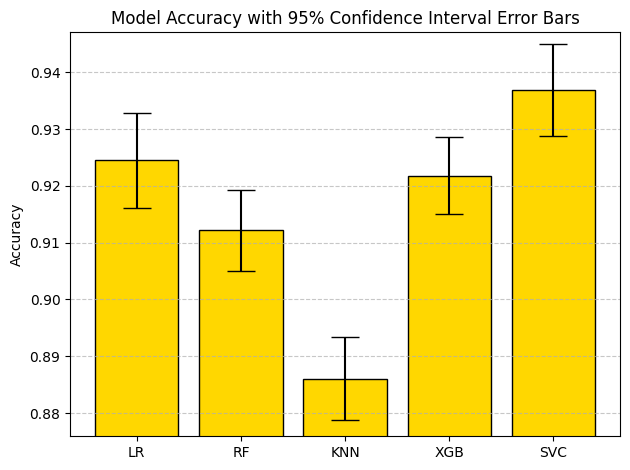

0.31810189810189815


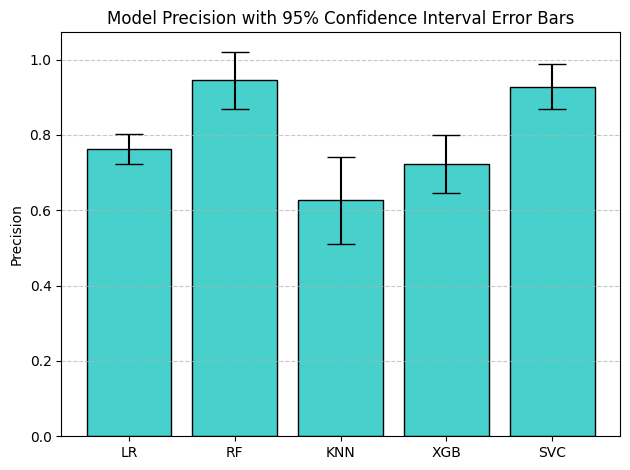

0.4014619883040936


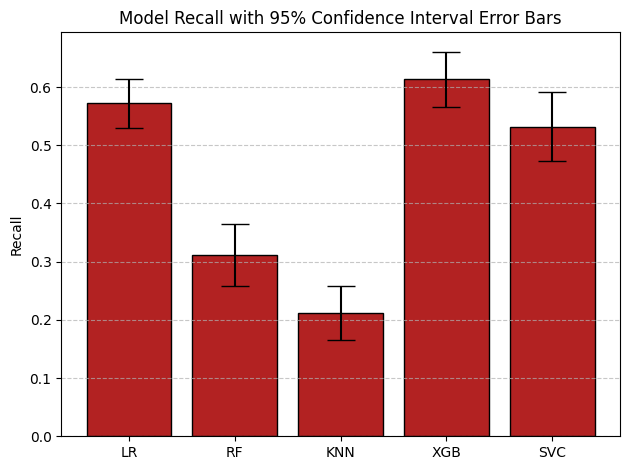

0.3594998336103142


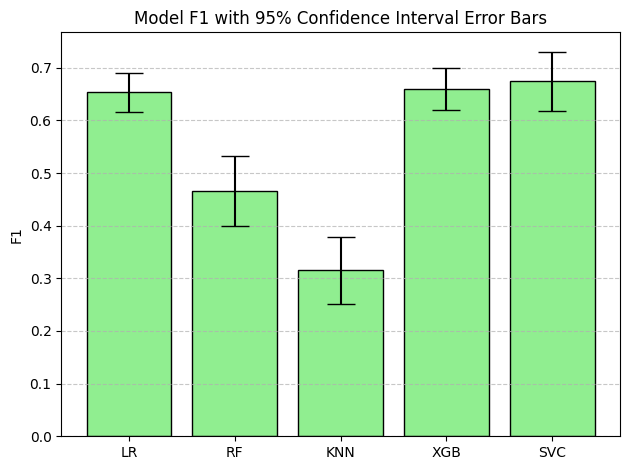

0.25401830673217773


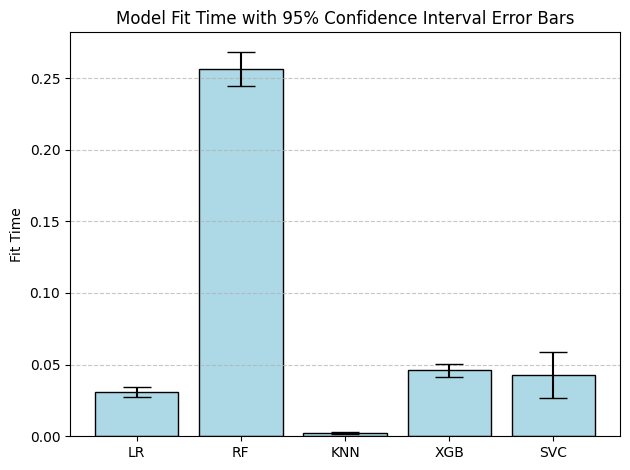

0.04281349182128907


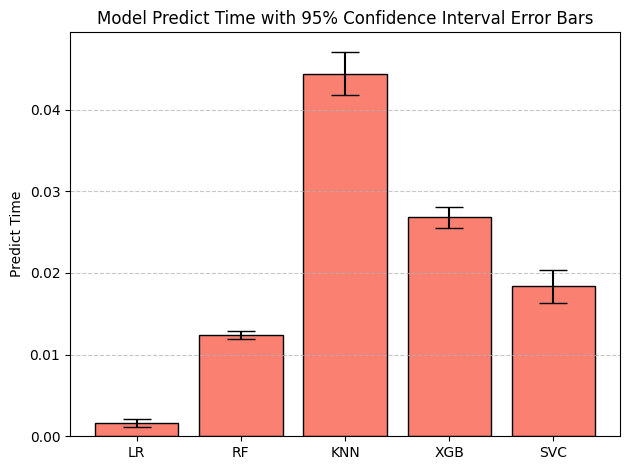

In [67]:
plotstats(tbltest,namelist)